In [1]:
import pandas as pd
# import pycaret
from pycaret.classification import *

train_df = pd.read_csv('dataset/BuyAffinity_Train1.csv')
test_df = pd.read_csv('dataset/BuyAffinity_Test1.csv')

In [2]:
exp_clf101 = setup(data = train_df, target = 'C', session_id=123) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(101180, 24)"
4,Missing Values,False
5,Numeric Features,19
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.7619,0.7273,0.0520,0.7006,0.0967,0.0650,0.1438,0.8200
1,CatBoost Classifier,0.7595,0.7216,0.0719,0.5790,0.1279,0.0780,0.1374,17.2703
2,Gradient Boosting Classifier,0.7559,0.7182,0.0104,0.6601,0.0205,0.0130,0.0597,29.2452
3,Naive Bayes,0.7546,0.5069,0.0000,0.0000,0.0000,0.0000,0.0000,0.0686
4,Ridge Classifier,0.7546,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1364
5,Linear Discriminant Analysis,0.7546,0.6864,0.0000,0.0000,0.0000,0.0000,0.0000,0.4240
6,Ada Boost Classifier,0.7544,0.6913,0.0050,0.4646,0.0100,0.0046,0.0257,5.7161
7,Quadratic Discriminant Analysis,0.7535,0.5001,0.0023,0.2426,0.0044,0.0001,0.0021,0.2199
8,Extra Trees Classifier,0.7534,0.6871,0.0094,0.3939,0.0183,0.0070,0.0265,3.5004
9,Extreme Gradient Boosting,0.7534,0.7183,0.1136,0.4897,0.1844,0.1013,0.1394,16.7909


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7556,0.7198,0.0122,0.5862,0.0240,0.0141,0.0568
1,0.7577,0.7143,0.0158,0.8148,0.0311,0.0219,0.0916
2,0.7563,0.7070,0.0094,0.7647,0.0185,0.0126,0.0662
3,0.7566,0.7283,0.0129,0.7200,0.0254,0.0169,0.0734
4,0.7545,0.7242,0.0058,0.4706,0.0114,0.0055,0.0287
5,0.7554,0.7110,0.0058,0.6667,0.0114,0.0072,0.0451
6,0.7570,0.7213,0.0122,0.8095,0.0241,0.0169,0.0800
7,0.7557,0.7184,0.0108,0.6522,0.0212,0.0133,0.0603
8,0.7554,0.7127,0.0115,0.5926,0.0226,0.0133,0.0558
9,0.7547,0.7248,0.0079,0.5238,0.0156,0.0083,0.0394


In [22]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7568,0.7209,0.0612,0.5380,0.1098,0.0629,0.1152
1,0.7631,0.7257,0.0878,0.6224,0.1538,0.0992,0.1659
2,0.7612,0.7243,0.0784,0.6022,0.1388,0.0872,0.1507
3,0.7584,0.7318,0.0777,0.5538,0.1363,0.0808,0.1354
4,0.7582,0.7285,0.0647,0.5625,0.1161,0.0690,0.1257
5,0.7603,0.7141,0.0683,0.6013,0.1227,0.0765,0.1401
6,0.7570,0.7120,0.0662,0.5380,0.1179,0.0678,0.1200
7,0.7596,0.7211,0.0676,0.5912,0.1213,0.0747,0.1365
8,0.7580,0.7191,0.0719,0.5556,0.1273,0.0753,0.1305
9,0.7619,0.7188,0.0755,0.6250,0.1347,0.0864,0.1541


In [6]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7623,0.7276,0.0475,0.7416,0.0892,0.0615,0.1457
1,0.7646,0.7261,0.0655,0.7222,0.1201,0.0826,0.1672
2,0.7616,0.7203,0.0482,0.7053,0.0902,0.0608,0.1396
3,0.7612,0.7369,0.0583,0.6480,0.1069,0.0693,0.1406
4,0.7605,0.7342,0.0468,0.6701,0.0874,0.0573,0.1303
5,0.7603,0.7231,0.0432,0.6818,0.0812,0.0535,0.1274
6,0.7609,0.7168,0.0504,0.6667,0.0936,0.0613,0.1346
7,0.7633,0.7285,0.0539,0.7500,0.1006,0.0700,0.1571
8,0.7616,0.7307,0.0546,0.6786,0.1011,0.0670,0.1429
9,0.7628,0.7292,0.0518,0.7423,0.0968,0.0669,0.1523


In [8]:
tuned_lgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7605,0.7180,0.0583,0.6279,0.1066,0.0678,0.1357
1,0.7616,0.7268,0.0942,0.5874,0.1624,0.1015,0.1609
2,0.7612,0.7257,0.0619,0.6370,0.1128,0.0725,0.1422
3,0.7571,0.7284,0.0576,0.5479,0.1042,0.0603,0.1144
4,0.7642,0.7385,0.0748,0.6753,0.1347,0.0902,0.1670
5,0.7561,0.7161,0.0532,0.5286,0.0967,0.0543,0.1048
6,0.7609,0.7201,0.0748,0.6012,0.1331,0.0833,0.1468
7,0.7623,0.7216,0.0640,0.6642,0.1167,0.0769,0.1514
8,0.7610,0.7289,0.0755,0.6069,0.1343,0.0846,0.1490
9,0.7640,0.7272,0.0812,0.6570,0.1446,0.0957,0.1692


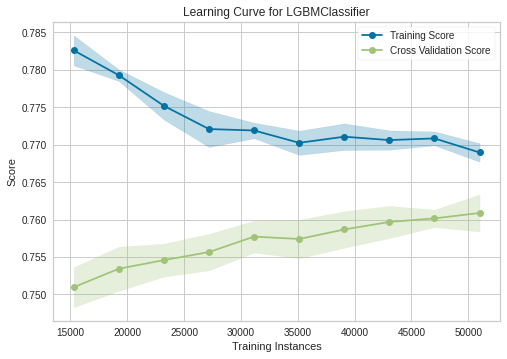

In [10]:
plot_model(estimator = tuned_lgbm, plot = 'learning')

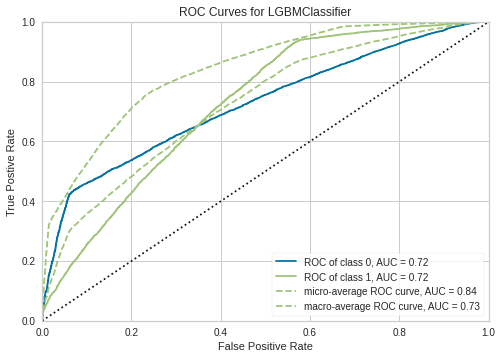

In [11]:
plot_model(estimator = tuned_lgbm, plot = 'auc')


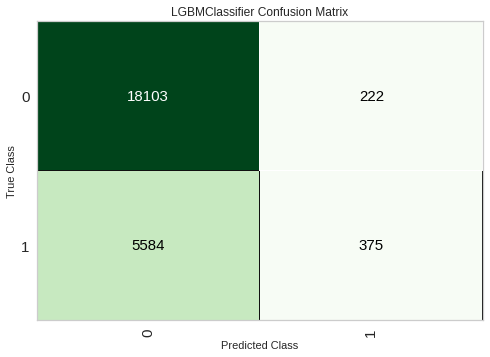

In [12]:
plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')


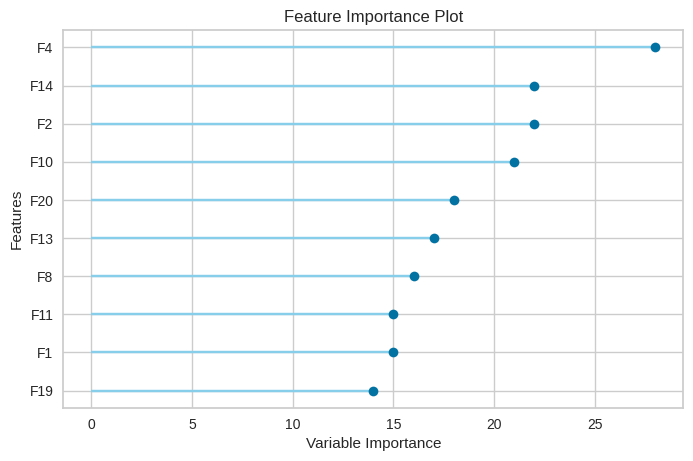

In [13]:
plot_model(estimator = tuned_lgbm, plot = 'feature')


In [14]:
evaluate_model(tuned_lgbm)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

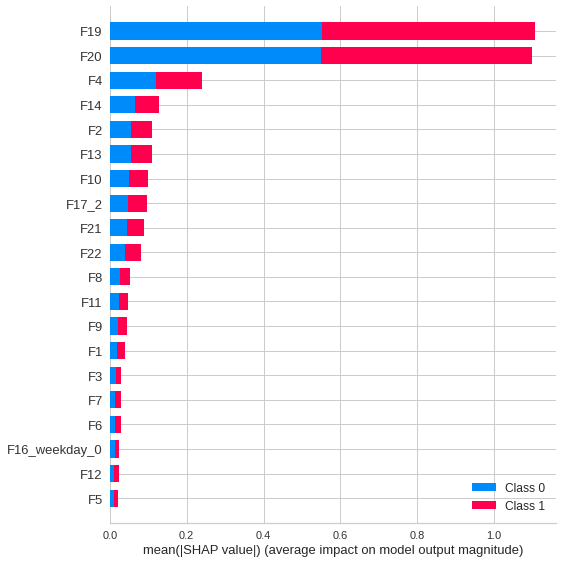

In [15]:
interpret_model(tuned_lgbm)


In [18]:
predictions = predict_model(tuned_lgbm, data=test_df)
predictions.shape

(19913, 25)

In [21]:
sub = pd.DataFrame()
sub['id'] = predictions['Index']
sub['C'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head()

,id,C
0,T30234341,0
1,T30234342,0
2,T30234343,0
3,T30234344,0
4,T30234345,0


In [25]:
#blending 3 models
blend = blend_models(estimator_list=[tuned_lgbm,catboost,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7598,0.0000,0.0353,0.7101,0.0672,0.0450,0.1199
1,0.7646,0.0000,0.0604,0.7500,0.1119,0.0781,0.1666
2,0.7624,0.0000,0.0432,0.7895,0.0819,0.0579,0.1475
3,0.7598,0.0000,0.0396,0.6790,0.0748,0.0491,0.1214
4,0.7609,0.0000,0.0424,0.7108,0.0801,0.0540,0.1319
5,0.7601,0.0000,0.0367,0.7183,0.0698,0.0471,0.1238
6,0.7614,0.0000,0.0468,0.7065,0.0877,0.0591,0.1377
7,0.7610,0.0000,0.0381,0.7681,0.0726,0.0506,0.1348
8,0.7621,0.0000,0.0496,0.7263,0.0929,0.0635,0.1459
9,0.7628,0.0000,0.0482,0.7701,0.0907,0.0636,0.1522
